# Distribution about locations, keywords and time
### 1. Let's see where the people care about the UA3411 incidents are from
### 2. About airlines and realated topics, what keywords are mentioned
### 3. See when do people twitt by the hour of a day

In [38]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import importlib
import warnings
import matplotlib.cbook
import matplotlib.pyplot as plt
mpl_toolkits = importlib.import_module('mpl_toolkits')
from mpl_toolkits.basemap import Basemap
import math
import numpy as np
import nltk
import os
import string
from nltk.corpus import stopwords
import json
import re
from pandas import DataFrame

# Let's see where the people care about the UA3411 incidents are from
### 1. Load data frame with processed location inforamtion from the tweets csv file
### 2. Draw a world's map
### 3. Extract the lattitudes and longintudes information from data frame
### 4. Use the location axis to draw on world's map

In [13]:
df = pd.read_csv('Data/Data_Clean/Tweets_withINFO.csv')
df1=df.drop_duplicates()
df0=df1.fillna(value=0)

In [5]:
df0.head()

,Unnamed: 0,id,name,created_at,text,country_code,long,latt,retweet_count,user_created,followers_count,friends_count,user_language,favorite_count
0,0,851471781827420160,United,Mon Apr 10 16:27:47 +0000 2017,United CEO response to United Express Flight 3...,US,-95.823268,29.522325,21757,Fri Mar 04 21:23:11 +0000 2011,913424,46648,en,7840
1,1,851875102769721344,United,Tue Apr 11 19:10:26 +0000 2017,United CEO Oscar Munoz: I’m sorry. We will fix...,US,-95.823268,29.522325,3098,Fri Mar 04 21:23:11 +0000 2011,913424,46648,en,4774
2,2,851383383888285696,United,Mon Apr 10 10:36:31 +0000 2017,@USAnonymous Flight 3411 from Chicago to Louis...,0,0.000000,0.000000,1373,Fri Mar 04 21:23:11 +0000 2011,913424,46648,en,852
3,3,851947964599648256,Triston,Tue Apr 11 23:59:57 +0000 2017,RT @UnitedOverBooks: now boarding flight 3411 ...,0,0.000000,0.000000,2235,Sun Jan 01 02:36:00 +0000 2012,1215,987,en,0
4,4,851947959851921408,TΞddy Rosenthal,Tue Apr 11 23:59:56 +0000 2017,RT @UnitedOverBooks: now boarding flight 3411 ...,0,0.000000,0.000000,2235,Thu Jul 09 15:01:43 +0000 2015,80,227,en,0


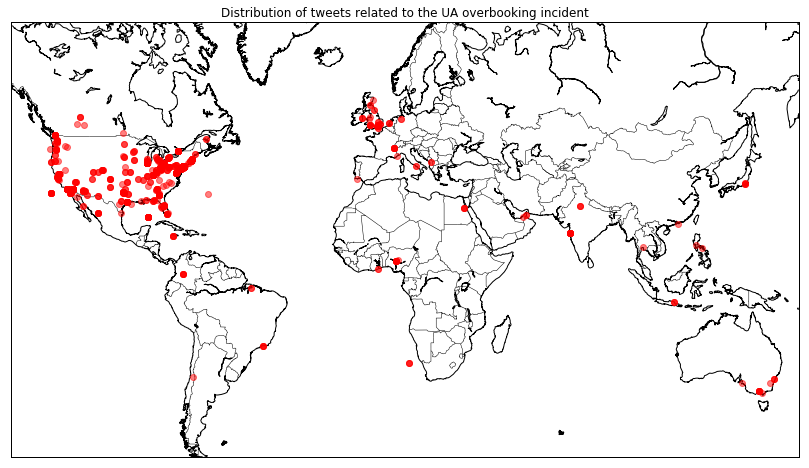

In [41]:
# setup Lambert Conformal basemap.
plt.figure(figsize=(20,8))
my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
                     resolution = 'l', area_thresh = 5000.0,
                     llcrnrlon=-140, llcrnrlat=-55,
                     urcrnrlon=160, urcrnrlat=70)
my_map.drawmapboundary()
my_map.drawcountries()
my_map.drawcoastlines()
# Get longitudes and lattitudes
longs=[]
latts=[]
x = list(df0['long'])
y = list(df0['latt'])
for i in range(len(x)):
    if x[i]!=0:
        longs.append(x[i])
for i in range(len(y)):
    if x[i]!=0:
        latts.append(y[i]) 
m, n = my_map(longs, latts)
# make marks on the map
my_map.plot(m, n, 'ro', markersize=6, alpha=0.5)
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
plt.title("Distribution of tweets related to the UA overbooking incident")
plt.savefig('plot_distribution_map.jpg')
plt.show()

# About airlines and realated topics, what keywords are mentioned
### 1. Load data frame with processed location inforamtion from the tweets csv file
### 2. Remove punctuation, number, empty place and stop words from original data
### 3. Draw a word cloud picture to show the hottest words are mentioned about this incident

In [10]:
#functions to remove punctuation, numbers, empty content and stop words
def remove_punctuation(words_list):
    words_noPunc = []
    words_punc = string.punctuation
    for word in words_list:
        buffer = 0
        for subword in word:
            if subword in words_punc:
                buffer += 1
        if buffer==0:
            words_noPunc.append(word)
    return words_noPunc
def remove_empty(words_list):
    words_noEmpty = []
    for word in words_list:
        if word != '':
            words_noEmpty.append(word)
    return words_noEmpty
def remove_stop(words_list):
    cachedStopWords = stopwords.words("english")
    words_noStop = [word for word in words_list if word not in cachedStopWords]
    return words_noStop
def remove_rt(words_list):
    words_noRT =[word for word in words_list if word!='RT']
    return words_noRT
def remove_http(x):
    x=re.sub(r'http\S+', '', x, flags=re.MULTILINE)
    return x  

In [11]:
list_sentences=list(df0['text'].apply(lambda x: remove_http(x)))

In [12]:
list_word=[]
for words in list_sentences:
    list_word.extend(words.split(' '))

In [13]:
list_word3=remove_punctuation(list_word)
list_word2=remove_empty(list_word3)
list_word1=remove_stop(list_word2)
list_word0=remove_rt(list_word1)

In [14]:
string_word=' '.join(word for word in list_word0)

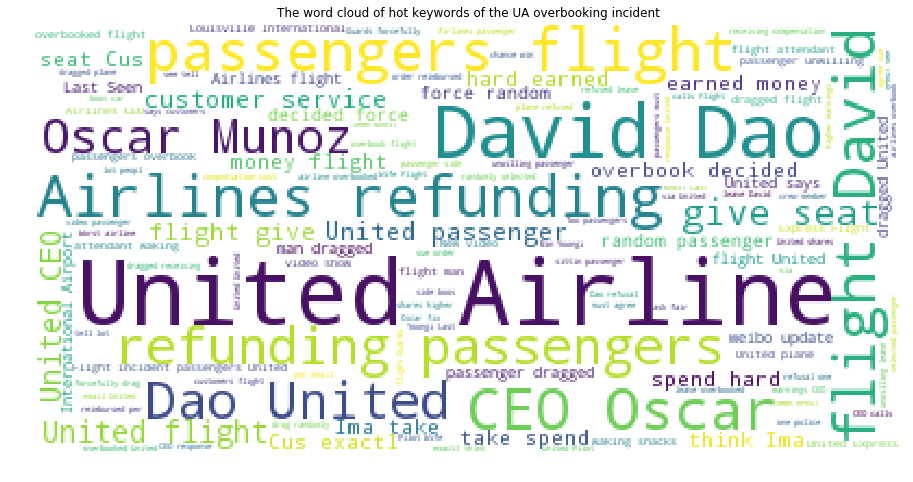

In [15]:
from wordcloud import WordCloud
plt.figure(figsize=(20,8))
wc = WordCloud(background_color="white", max_words=2000)
# generate word cloud
wordcloud=wc.generate(string_word)
# show
plt.imshow(wordcloud)
plt.axis('off')
plt.title('The word cloud of hot keywords of the UA overbooking incident')
plt.savefig('plot_distribution_words.jpg')
plt.show()

# People habit of tweets
### 1. Get what hour of a day that people tweet and count the number of them
### 2. Plot a figure to show the trend

In [16]:
import datetime
import numpy as np

In [10]:
def get_time(x):
    datetime_object = datetime.datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y')
    time=datetime_object.strftime("%Y%m%d %H:%M:%S")
    y=time[-8:-6]
    return y

In [26]:
df11=DataFrame(df0['created_at'].apply(lambda x: get_time(x)))

In [28]:
df11['token']=1

In [29]:
df11.head()

,created_at,token
0,16,1
1,19,1
2,10,1
3,23,1
4,23,1


In [30]:
list_time=list(df11.groupby('created_at')['token'].sum())

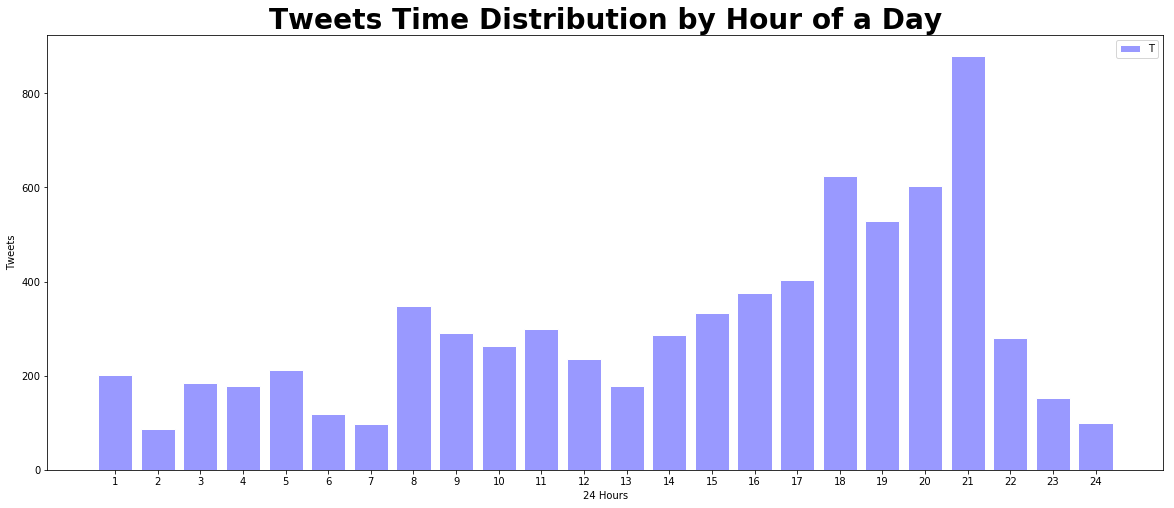

In [37]:
plt.figure(figsize=(20,8))
x = np.arange(24)
ax = plt.subplot(111)
p1=ax.bar(x, list_time, facecolor='#9999ff', edgecolor='white')
plt.legend([p1], 'Tweets')
plt.xticks(x, np.arange(1,25,1) )
ax.set_title('Tweets Time Distribution by Hour of a Day', fontsize=28, fontweight='bold')
plt.xlabel('24 Hours')
plt.ylabel('Tweets')
plt.savefig('Tweet_time.jpg')
plt.show()